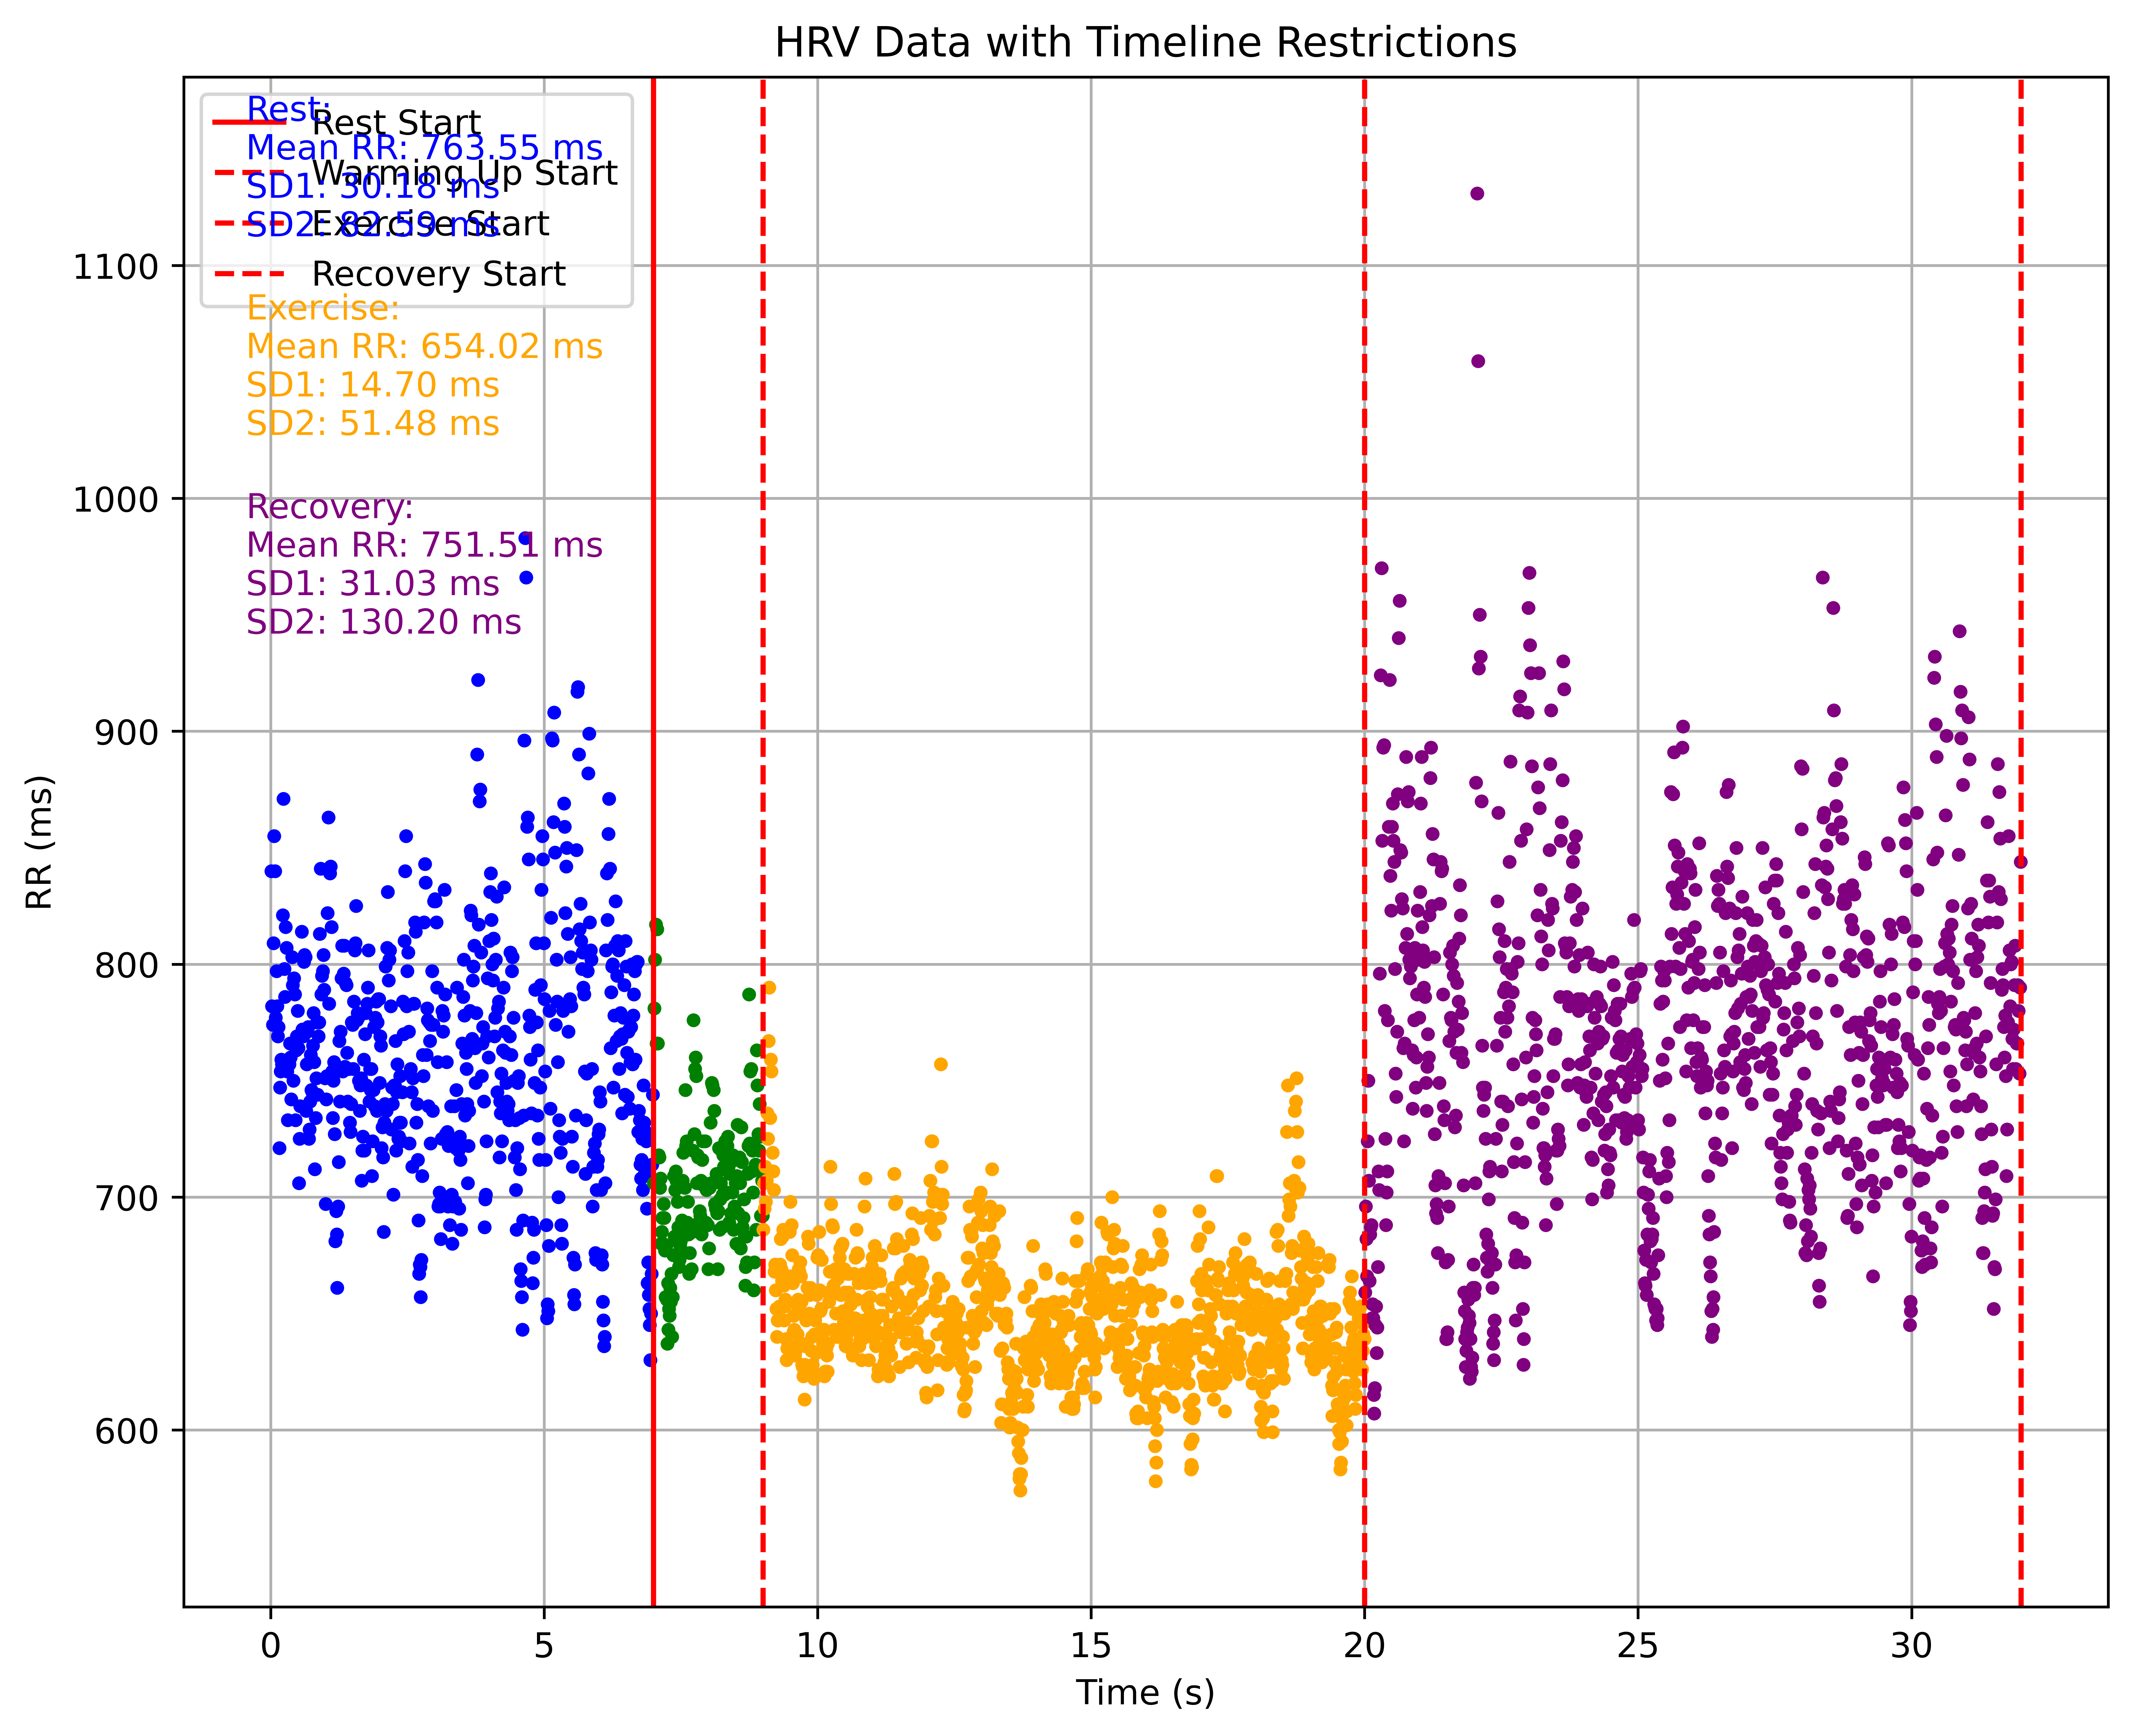

C:\Users\think\AppData\Local\Temp\ipykernel_17948\2271778492.py:127: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, c=color_x, cmap=plt.cm.colors.ListedColormap([colors['Rest'], colors['Warming_up'], colors['Exercise'], colors['Recovery']]), s=10)


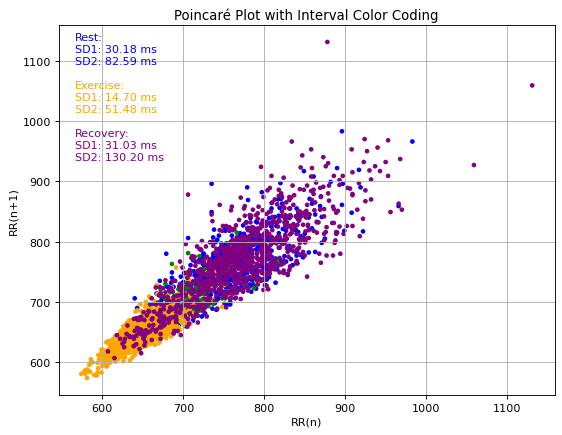

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# Get file path from command-line argument
file_path = r"C:\Users\think\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\Desktop\SS\TEST_1\aca100wD.txt"

# Load data from the provided file
data = np.loadtxt(file_path)

# Timeline restrictions
Rest = 7        # 7 minutes of rest
Warming_up = 9  # 2 minutes of warming up
Exercise = 20   # 11 minutes of exercise
Recovery = 32   # 12 minutes of recovery

# Filter out zero values
filtered_data = data[data[:, 1] != 0]
hrv_data = filtered_data[:, 1]
time_data = filtered_data[:, 0]

# Function to calculate SD1 and SD2
def calculate_sd1_sd2(series):
    n = len(series)
    sd1 = np.sqrt(np.mean([(series[i] - series[i + 1]) ** 2 / np.sqrt(2) for i in range(n - 1)]))
    sd2 = np.sqrt(np.mean([(series[i] + series[i + 1] - 2 * np.mean(series)) ** 2 / np.sqrt(2) for i in range(n - 1)]))
    return sd1, sd2

# Calculate RR mean, SD1, and SD2 for each interval
def calculate_interval_statistics(time_data, hrv_data):
    intervals = {
        'Rest': (0, 6),
        'Exercise': (8, 19),
        'Recovery': (19, 29)
    }
    
    stats = {}
    
    for interval, (start, end) in intervals.items():
        mask = (time_data >= start) & (time_data < end)
        interval_data = hrv_data[mask]
        
        if len(interval_data) > 1:  # Ensure there's enough data for SD calculation
            rr_mean = np.mean(interval_data)
            sd1, sd2 = calculate_sd1_sd2(interval_data)
            stats[interval] = {
                'Mean': rr_mean,
                'SD1': sd1,
                'SD2': sd2
            }
    
    return stats

# Function to plot the raw data with different colors for intervals
def plot_data(file_path, stats):
    AA = np.loadtxt(file_path)
    time_data = AA[:, 0]
    hrv_values = AA[:, 1]

    plt.figure(figsize=(10, 8), dpi=800)
    
    # Define colors for different intervals
    colors = {'Rest': 'blue', 'Warming_up': 'green', 'Exercise': 'orange', 'Recovery': 'purple'}
    
    # Plot each interval with its corresponding color
    for i in range(len(time_data)):
        if time_data[i] < Rest:
            color = colors['Rest']
        elif time_data[i] < Warming_up:
            color = colors['Warming_up']
        elif time_data[i] < Exercise:
            color = colors['Exercise']
        elif time_data[i] < Recovery:
            color = colors['Recovery']
        else:
            continue
        
        plt.plot(time_data[i], hrv_values[i], '.', color=color)

    plt.ylim(hrv_data.min() - 50, hrv_data.max() + 50)
    plt.xlabel("Time (s)")
    plt.ylabel("RR (ms)")
    plt.title("HRV Data with Timeline Restrictions")
    plt.axvline(x=Rest, color='r', linestyle='-', label='Rest Start')
    plt.axvline(x=Warming_up, color='r', linestyle='--', label='Warming Up Start')
    plt.axvline(x=Exercise, color='r', linestyle='--', label='Exercise Start')
    plt.axvline(x=Recovery, color='r', linestyle='--', label='Recovery Start')
    plt.legend()
    plt.grid(True)
    
    # Print stats
    for interval, values in stats.items():
        plt.figtext(0.15, 0.8 - 0.1 * list(stats.keys()).index(interval),
                    f'{interval}:\nMean RR: {values["Mean"]:.2f} ms\nSD1: {values["SD1"]:.2f} ms\nSD2: {values["SD2"]:.2f} ms',
                    fontsize=10, color=colors.get(interval, 'black'))
    
    plt.show()

# Poincare plot function with color coding
def Poincare_plot(hrv_data, time_data, stats):
    x = []
    y = []
    colors = {'Rest': 'blue', 'Warming_up': 'green', 'Exercise': 'orange', 'Recovery': 'purple'}
    color_x = []
    color_y = []

    for i in range(len(hrv_data) - 1):
        x.append(hrv_data[i])     # RR(n)
        y.append(hrv_data[i + 1]) # RR(n+1)
        # Determine color based on the time of RR(n) and RR(n+1)
        if time_data[i] < Rest:
            color_x.append(colors['Rest'])
            color_y.append(colors['Rest'])
        elif time_data[i] < Warming_up:
            color_x.append(colors['Warming_up'])
            color_y.append(colors['Warming_up'])
        elif time_data[i] < Exercise:
            color_x.append(colors['Exercise'])
            color_y.append(colors['Exercise'])
        elif time_data[i] < Recovery:
            color_x.append(colors['Recovery'])
            color_y.append(colors['Recovery'])
        else:
            continue

    plt.figure(figsize=(8, 6), dpi=80)
    plt.scatter(x, y, c=color_x, cmap=plt.cm.colors.ListedColormap([colors['Rest'], colors['Warming_up'], colors['Exercise'], colors['Recovery']]), s=10)
    plt.xlabel("RR(n)")
    plt.ylabel("RR(n+1)")
    plt.title("Poincaré Plot with Interval Color Coding")
    plt.grid(True)
    
    # Print SD values
    for interval, values in stats.items():
        plt.figtext(0.15, 0.8 - 0.1 * list(stats.keys()).index(interval),
                    f'{interval}:\nSD1: {values["SD1"]:.2f} ms\nSD2: {values["SD2"]:.2f} ms',
                    fontsize=10, color=colors.get(interval, 'black'))

    plt.show()

# Calculate statistics
stats = calculate_interval_statistics(time_data, hrv_data)

# Call the plotting functions
plot_data(file_path, stats)
Poincare_plot(hrv_data, time_data, stats)